In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
iris = pd.read_csv('iris.dat', header = None, delim_whitespace=True)
iris.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']
#iris['Class'].replace([1,2,3],["setosa", 'versicolor', 'virginica'], inplace = True)
iris

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [3]:
Iris = iris.iloc[:, :-1]
Iris['label'] = Iris.index
Iris

,Sepal length,Sepal width,Petal length,Petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,4
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,145
146,6.3,2.5,5.0,1.9,146
147,6.5,3.0,5.2,2.0,147
148,6.2,3.4,5.4,2.3,148


In [4]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Iris2 = Iris.copy()
Iris2.iloc[:,0:4] = scaler.fit_transform(Iris2.iloc[:,0:4])
Iris2

,Sepal length,Sepal width,Petal length,Petal width,label
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,2
3,0.083333,0.458333,0.084746,0.041667,3
4,0.194444,0.666667,0.067797,0.041667,4
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,145
146,0.555556,0.208333,0.677966,0.750000,146
147,0.611111,0.416667,0.711864,0.791667,147
148,0.527778,0.583333,0.745763,0.916667,148


## (a) Perform hierarchical cluster analysis using centroid method

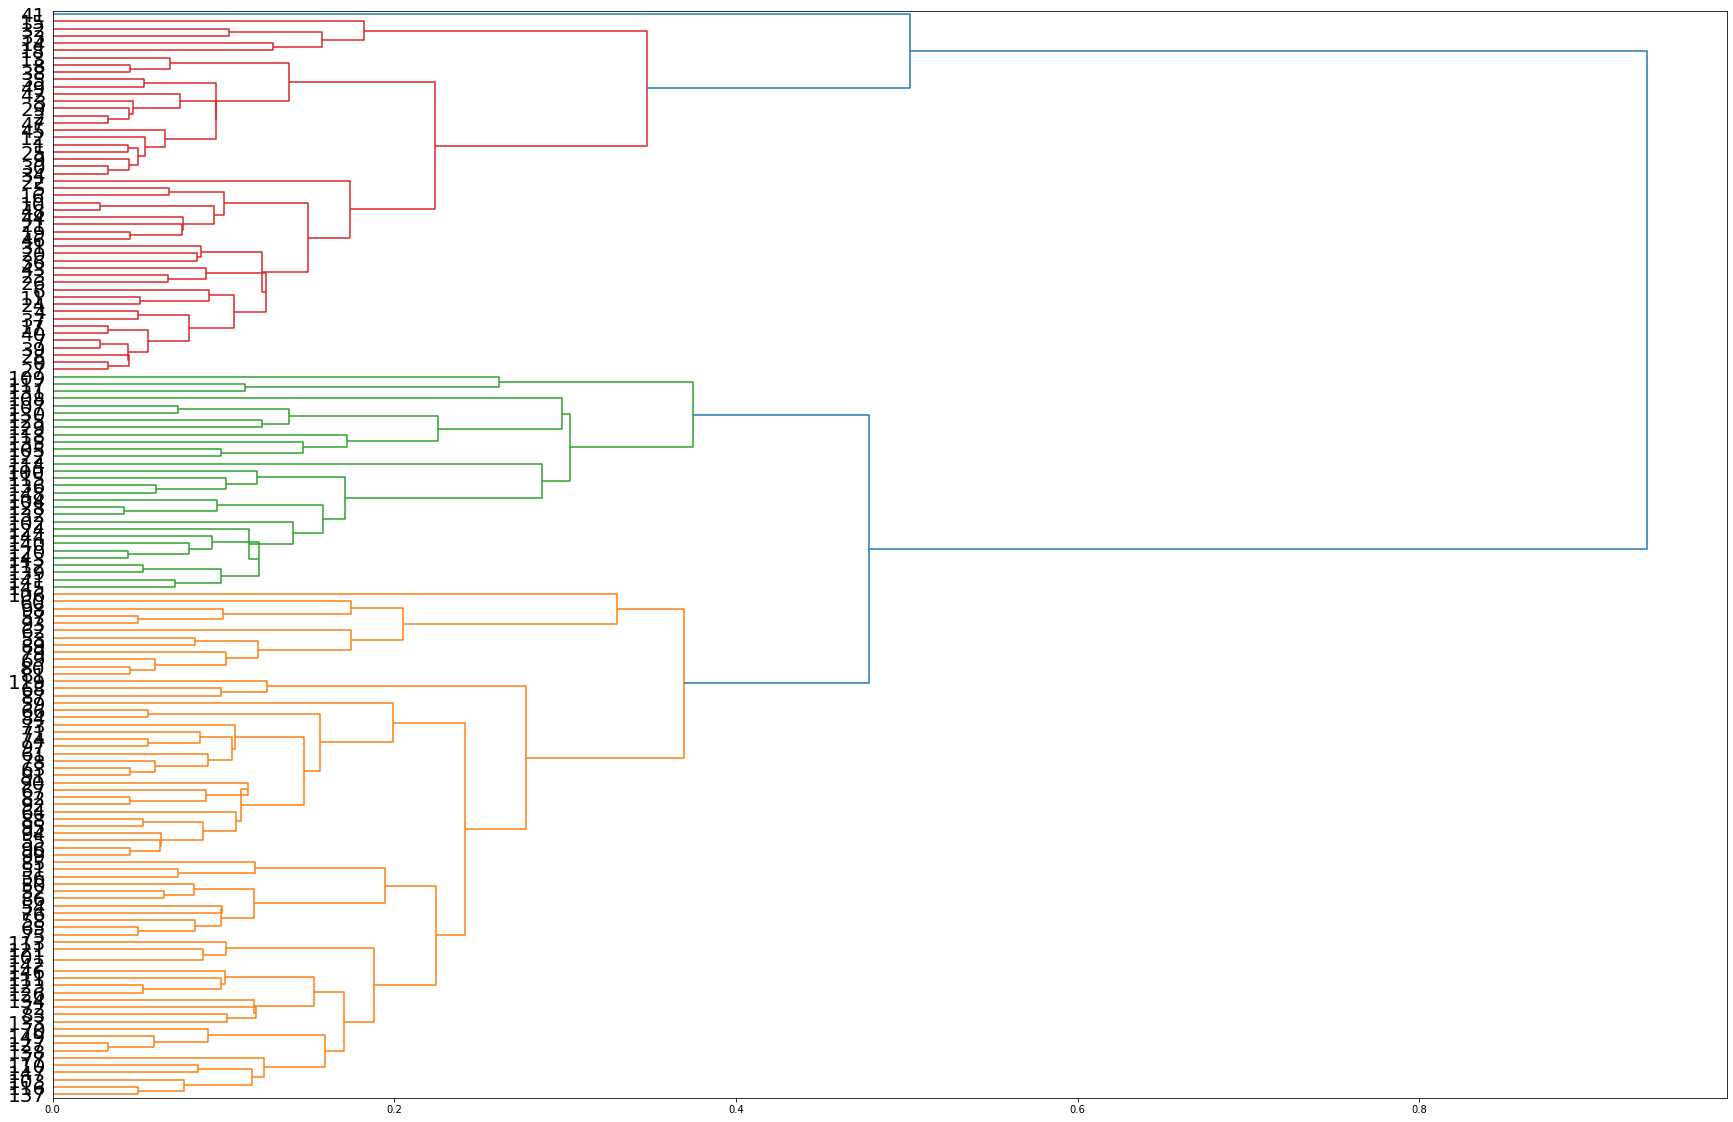

In [5]:
X = Iris2.iloc[:, 0:4]
linked = linkage(X, method = 'centroid')
labelList = Iris2['label'].values

plt.figure(figsize = (30, 20))
dendrogram(linked, orientation = 'right',
           color_threshold = 0.4,
          count_sort = 'descending', 
          distance_sort = 'descending',
          labels = labelList, 
          leaf_font_size = 20)
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
hclus = AgglomerativeClustering(n_clusters=3, metric = 'euclidean', linkage='average') # affinity 대신 metric 사용
group = hclus.fit_predict(X)
group = pd.DataFrame(group, columns = ['cluster'])
Xgroup = X.join(group)
Xgroup

# ttribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

,Sepal length,Sepal width,Petal length,Petal width,cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


## (b) Plot the first two principal component scores with the cluster label.

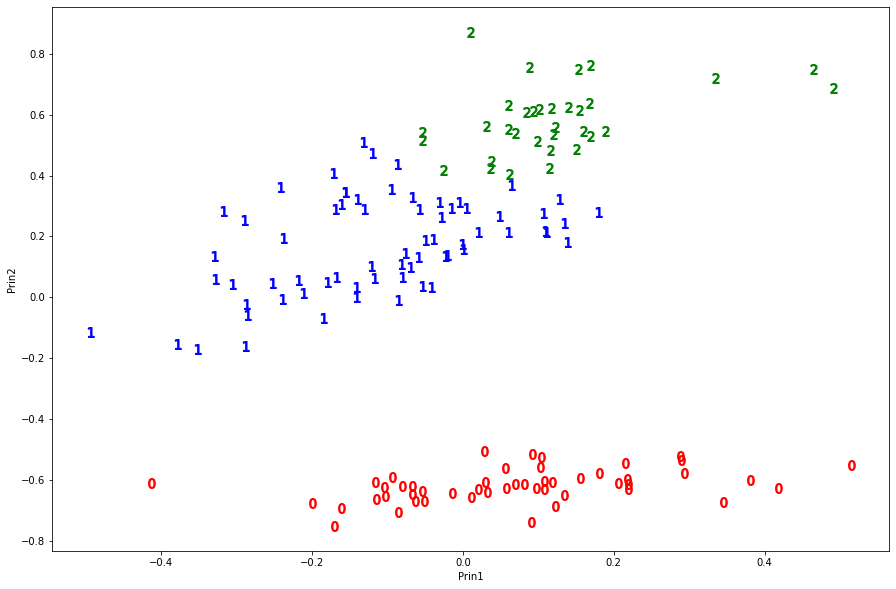

In [7]:
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
plt.figure(figsize = (15,10))
plt.xlabel('Prin1')
plt.ylabel('Prin2')
color = {0:'red', 1:'blue', 2:'green'}
for i in range(len(Iris2)):
    plt.scatter(pc[i,1], pc[i,0],
               marker = "$ {} $".format(Xgroup['cluster'][i]),
               s = 100,
               c = color[Xgroup['cluster'][i]])

## (c) Compare the clusters with the actual class using confusion matrix.

In [8]:
print("Predicted Class :", Xgroup['cluster'].values)
print("True Class :", iris['Class'].values)
# 예측된 class label이 실제 label과 다름 
# => 0은 1, 1은 2, 2는 3으로 바꿔주기

Predicted Class : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
True Class : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [9]:
map_dictionary = {0:1, 1:2, 2:3}
Xgroup['y_pred'] = Xgroup['cluster'].map(map_dictionary) 
Xgroup

,Sepal length,Sepal width,Petal length,Petal width,cluster,y_pred
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,3
146,0.555556,0.208333,0.677966,0.750000,1,2
147,0.611111,0.416667,0.711864,0.791667,2,3
148,0.527778,0.583333,0.745763,0.916667,2,3


In [10]:
from sklearn.metrics import confusion_matrix
actual = iris['Class']
pred = Xgroup['y_pred']

C1 = pd.DataFrame(confusion_matrix(actual, pred),
                  index = np.sort(iris['Class'].unique()), 
                  columns = np.sort(np.unique(Xgroup['y_pred'])))
C1['Total'] = C1.sum(axis = 1) #row sum
C1.loc['Total',:] = C1.sum(axis = 0) # column sum
C1.index.names = ['From Class'] ; C1.columns.names = ['Classified Class']
C1.astype(int)

Classified Class,1,2,3,Total
From Class,,,,
1,50,0,0,50
2,0,50,0,50
3,0,17,33,50
Total,50,67,33,150


## (d) Perform the K-means cluster analysis with the number of clusters you acquired in (a).

In [11]:
kmeans = KMeans(n_clusters = 3, random_state = 1, n_init = 'auto').fit(X)
group = pd.DataFrame(kmeans.labels_, columns = ['cluster'])
Xkmean = X.join(group)
Xkmean

,Sepal length,Sepal width,Petal length,Petal width,cluster
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1
146,0.555556,0.208333,0.677966,0.750000,1
147,0.611111,0.416667,0.711864,0.791667,1
148,0.527778,0.583333,0.745763,0.916667,1


## (e) Plot the first two principal component scores with the cluster label.

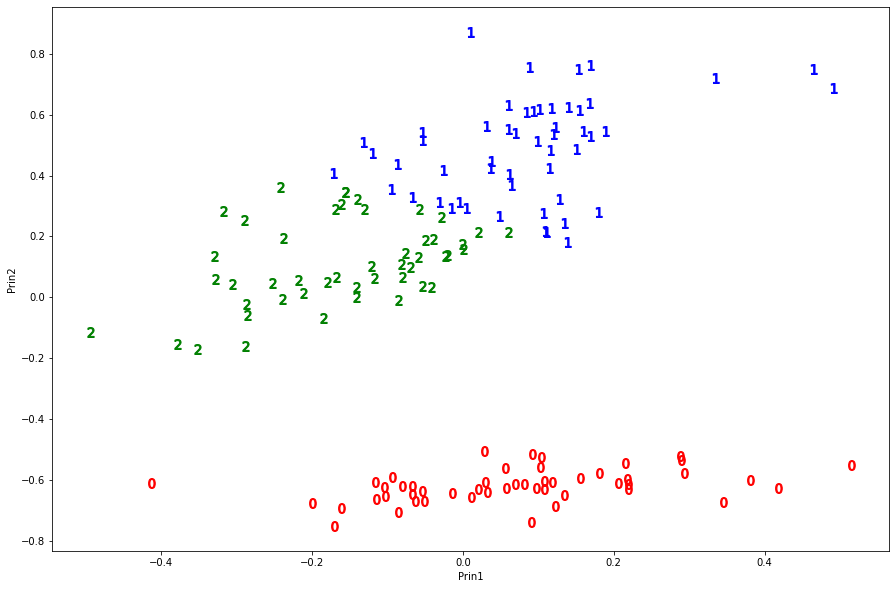

In [12]:
plt.figure(figsize = (15,10))
plt.xlabel('Prin1')
plt.ylabel('Prin2')
color = {0:'red', 1:'blue', 2:'green'}
for i in range(len(Iris2)):
    plt.scatter(pc[i,1], pc[i,0],
               marker = "$ {} $".format(Xkmean['cluster'][i]),
               s = 100,
               c = color[Xkmean['cluster'][i]])

## (f) Compare the results of the two cluster analyses using confusion matrix. Do they produce similar clusters?

In [13]:
# 두 클러스링 분석 결과 비교
print("Clustering1 :", Xgroup['cluster'].values)
print("Clustering2 :", Xkmean['cluster'].values)

Clustering1 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 1 2 2
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Clustering2 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 2 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1]


In [14]:
# kmeans 클러스터링 결과 class 바꿔주기 
kmeans_pred = Xkmean['cluster'].values
kmeans_pred_new = np.where(kmeans_pred == 1, 2, np.where(kmeans_pred == 2, 1, kmeans_pred))
kmeans_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2])

In [15]:
pred1 = Xgroup['cluster']
pred2 = kmeans_pred_new

C1 = pd.DataFrame(confusion_matrix(pred1, pred2),
                  index = np.sort(Xgroup['cluster'].unique()), 
                  columns = np.sort(np.unique(Xkmean['cluster'])))
C1['Total'] = C1.sum(axis = 1) #row sum
C1.loc['Total',:] = C1.sum(axis = 0) # column sum
C1.index.names = ['Clustering1'] ; C1.columns.names = ['Clustering2']
C1.astype(int)

Clustering2,0,1,2,Total
Clustering1,,,,
0,50,0,0,50
1,0,48,19,67
2,0,0,33,33
Total,50,48,52,150
